In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# lay du lieu diabetes - du lieu ve benh tieu duong
diabetes = datasets.load_diabetes()
print("Số chiều dữ liệu input: ", diabetes.data.shape)
print("Kiểu dữ liệu input: "
, type(diabetes.data))
print("Số chiều dữ liệu target: ", diabetes.target.shape)
print("Kiểu dữ liệu target: "
, type(diabetes.target))
print()
print("5 mẫu dữ liệu đầu tiên:")
print("input: ", diabetes.data[:5])
print("target: ",diabetes.target[:5])
#print("data[5,1]", diabetes.data[4,1])

Số chiều dữ liệu input:  (442, 10)
Kiểu dữ liệu input:  <class 'numpy.ndarray'>
Số chiều dữ liệu target:  (442,)
Kiểu dữ liệu target:  <class 'numpy.ndarray'>

5 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
target:  [151.  75. 141. 206. 135.]


In [29]:
# cat nho du lieu, lay 1 phan cho qua trinh thu nghiem,
# chia train test cac mau du lieu
# diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data
diabetes_X_train = diabetes_X[:361]
diabetes_y_train = diabetes.target[:361]
diabetes_X_test = diabetes_X[362:]
diabetes_y_test = diabetes.target[362:]

In [30]:
##### exercise #####
# Yêu cầu: Cài đặt mô hình Ridge Regression với alpha = 0.1
# Gợi ý: xem hướng dẫn tại https://scikit-learn.org/stable/modules/generated/
# sklearn.linear_model.Ridge.html
######################

ridg = linear_model.Ridge(alpha=50)

In [31]:
ridg.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ... w_n] = ", ridg.coef_)
print("w0 = ", ridg.intercept_)

[w1, ... w_n] =  [ 4.41488805  0.2608975  14.28800643 10.52125809  5.59018587  4.64442231
 -9.69574556 11.08248929 14.13199911  9.94910389]
w0 =  152.00898985806097


In [32]:

y_pred_linear = ridg.predict(diabetes_X_test)
print("Gia tri du doan cho mô hình linear regression: ", y_pred_linear)

Gia tri du doan cho mô hình linear regression:  [154.68729864 152.39597186 153.65789014 152.99809037 156.68779136
 156.28274232 154.86187859 152.72215279 147.81095558 154.86043593
 150.87641927 149.80121477 148.3217955  153.92411931 156.02064058
 153.6304887  152.89916238 149.02843093 151.28876432 148.84765346
 154.5932419  150.52503567 152.32260785 150.75175671 149.8574791
 148.89541823 152.60710367 148.61689491 156.69849695 147.26523483
 151.60183232 148.91382206 156.19191644 151.0579179  148.02766717
 151.90814972 152.26846772 154.14042411 151.52774447 148.61098766
 153.91778623 154.54723202 152.127284   154.68621574 146.3930479
 153.14304506 154.61320106 154.42322759 153.28016782 149.63621842
 155.11860305 150.34935192 155.76602189 153.38368282 154.27721743
 150.99611312 151.45473269 148.27234364 152.6886648  155.1537538
 154.27793505 154.01480449 153.28520881 147.26738425 155.07763122
 150.49390932 157.58626073 149.98629577 151.28904228 150.70607079
 155.42966252 148.61533779 151.

In [33]:
diabetes_y_pred = ridg.predict(diabetes_X_test)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
abs(diabetes_y_test - diabetes_y_pred)]).T,
columns=["Thực tế","Dự đoán","Lệch"])



,Thực tế,Dự đoán,Lệch
0,321.0,154.687299,166.312701
1,58.0,152.395972,94.395972
2,262.0,153.657890,108.342110
3,206.0,152.998090,53.001910
4,233.0,156.687791,76.312209
...,...,...,...
75,178.0,153.833890,24.166110
76,104.0,152.547279,48.547279
77,132.0,151.499102,19.499102
78,220.0,153.473359,66.526641


,values
count,80.00000
mean,152.38750
std,78.46994
min,40.00000
25%,72.00000
50%,140.00000
75%,217.50000
max,321.00000


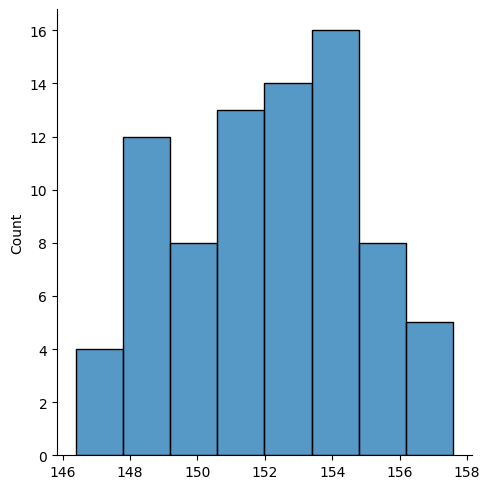

In [34]:
import seaborn as sns
sns.displot(diabetes_y_pred)
pd.DataFrame(data=diabetes_y_test, columns=["values"]).describe()

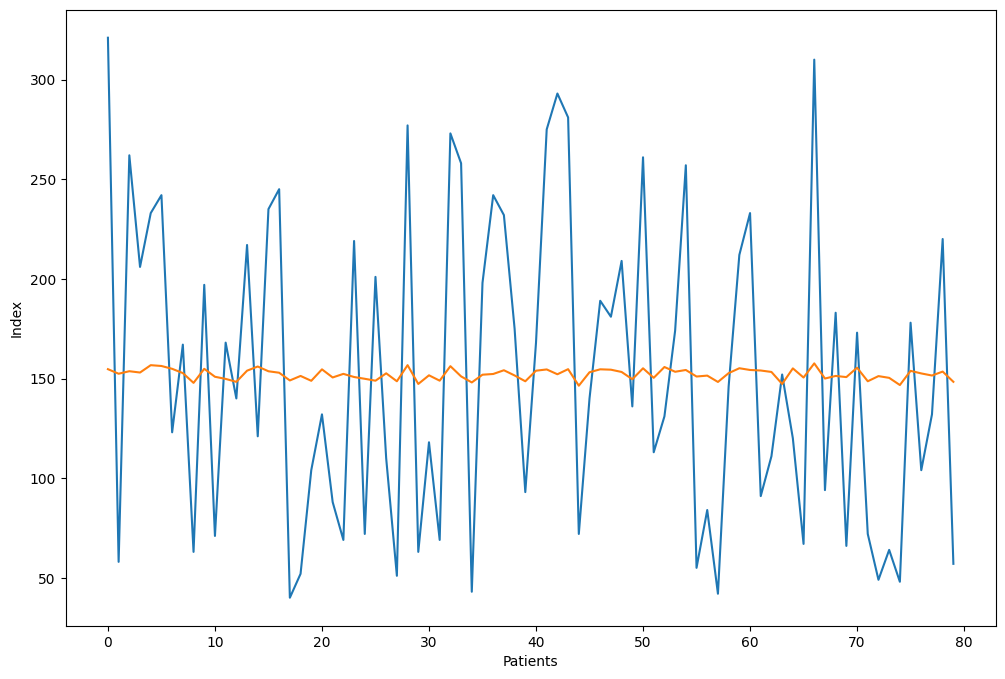

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(diabetes_y_test)
plt.plot(diabetes_y_pred)
plt.xlabel('Patients')
plt.ylabel('Index')
# function to show the plot
plt.show()